# Resolucion del problema 8 de la práctica

El sistema de ecuaciones en estudio es:

$$ \begin{cases}
            T_1\sin{\theta_1}-T_2\sin{\theta_2}-W_1=0 \\
            T_1\cos{\theta_1}-T_2\cos{\theta_2} =0 \\
            T_2\sin{\theta_2}+T_3\sin{\theta_3}-W_2=0 \\
            T_2\cos{\theta_2}-T_3\cos{\theta_3} =0 \\
            L_1\cos{\theta_1}+L_2\cos{\theta_2}+L_3\cos{\theta_3} =L \\
            L_1\sin{\theta_1}+L_2\sin{\theta_2}-L_3\sin{\theta_3} =0
   \end{cases} $$
   
   con $ L=8m $, $L_1=3m$, $L_2=4m$, $L_3=4m$, $W_1=10N$ y $W_2=20N$.

Comenzamos codificando el método de Newton Raphson para sistemas no lineales como una función

In [2]:
import matplotlib.pyplot as plt
def NL_Newton_Raphson(y, fun, jac, tol=10e-5, iter_max=100, plot_conv=False):
    '''Implementacion del metodo de Newton-Raphson
       para sistemas de ecuaciones no lineales
       '''
    from numpy.linalg import solve, norm

    iter=0
    if plot_conv:
        iters = np.array(iter)
        y_iters = np.array([y])

    while (iter<iter_max):
        J=jac(y)
        f=fun(y)
        Delta_y=solve(J, -f)            # Uso una rutina de numpy, pero podria llamar a Gauss Jordan
        y += Delta_y                    # es lo mismo que y = y + Delta_y
        # print(iter, y)
        if (norm(Delta_y)<tol): break
        iter += 1
        if plot_conv:
            y_iters = np.append(y_iters, [y], axis=0)
            iters = np.append(iters, iter)
    if plot_conv:  plt.plot(iters, y_iters)
    return y

Para probar si el código funciona correctamente, lo aplicamos al sistema de ecuaciones que se muestra como ejemplo en las diapositivas de teoría:
$$ \begin{cases}
           f_0=x_0^2-2x_0-x_1+0.5=0 \\
           f_1=x_0^2+4x_1^2-4=0
    \end{cases}$$

Funcion en el punto inicial:
[0.25 0.25]

Solucion encontrada:

 x_1=1.9006767263670659 
 x_2=0.31121856541929427

Funcion en el punto final:
[0. 0.]



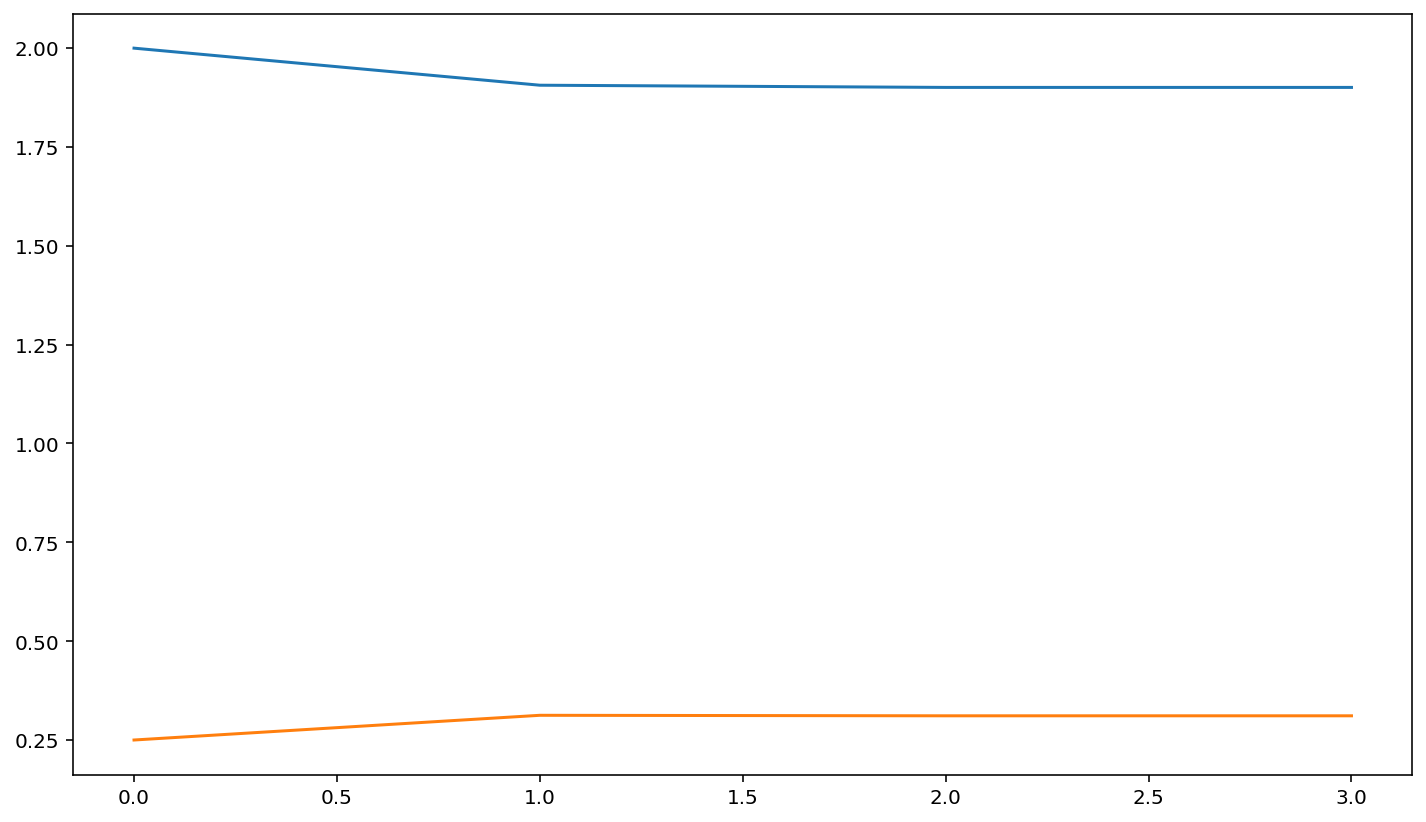

In [4]:
import numpy as np

def fun_ej(y):
    f=np.zeros_like(y)

    f[0]=y[0]**2-2.0*y[0]-y[1]+0.5
    f[1]=y[0]**2+4.0*y[1]**2-4.0

    return f


def jac_ej(y):
    df0 = [2.0*y[0]-2.0, -1.0      ]
    df1 = [2.0*y[0]    , 8.0*y[1]  ]

    return [df0, df1]

# Seteo de condiciones iniciales
y_inicial = np.array([2.0, 0.25])

# Valor de la funcion en el punto inicial
print('Funcion en el punto inicial:\n{}\n'.format(fun_ej(y_inicial)))

# Calculo de la solucion
y_final = NL_Newton_Raphson(y=y_inicial, fun=fun_ej, jac=jac_ej, tol=1e-8, plot_conv=True)

# Valor de la solucion encontrada
print('Solucion encontrada:\n\n x_1={} \n x_2={}'.format(y_final[0], y_final[1]))

# Valor de la funcion en el punto final
print('\nFuncion en el punto final:\n{}\n'.format(fun_ej(y_final)))

Ahora definimos una funcion vectorial que evalúe el sistema de ecuaciones del problema 8, así como también una función que evalúe la matriz Jacobiana de dicha función vectorial. En una implementación de un código FORTRAN acorde a como venimos desarrollando en la materia, las funciones o subrutinas correspondientes van en el modulo my_funcs.

In [5]:
# Estas variables son globales, es decir que se pueden acceder desde cualquier función
W1=10
W2=20
L_1=3.0
L_2=4.0
L_3=4.0
L=8.0

def fun_1(y):
    '''Sistema de ecuaciones del ejercicio 8.a de la practica 4
    Mapeo de variables:
        y[0] <--> T_1
        y[1] <--> T_2
        y[2] <--> T_3
        y[3] <--> theta_1
        y[4] <--> theta_2
        y[5] <--> theta_3
    '''
    f=np.zeros_like(y)          # se crea un arreglo f que tiene la misma forma de el argumento de entrada y

    f[0]=y[0]*np.sin(y[3])-y[1]*np.sin(y[4])-W1
    f[1]=y[0]*np.cos(y[3])-y[1]*np.cos(y[4])
    f[2]=y[1]*np.sin(y[4])+y[2]*np.sin(y[5])-W2
    f[3]=y[1]*np.cos(y[4])-y[2]*np.cos(y[5])
    f[4]=L_1*np.cos(y[3])+L_2*np.cos(y[4])+L_3*np.cos(y[5])-L
    f[5]=L_1*np.sin(y[3])+L_2*np.sin(y[4])-L_3*np.sin(y[5])

    return f                    # con return es como se asigna la variable de salida en python


def jac_1(y):
    '''Jacobiano de la funcion en fun_1'''

    df0 = [ np.sin(y[3]), -np.sin(y[4]),  0.0         ,  y[0]*np.cos(y[3]), -y[1]*np.cos(y[4]), 0.0                ]
    df1 = [ np.cos(y[3]), -np.cos(y[4]),  0.0         , -y[0]*np.sin(y[3]),  y[1]*np.sin(y[4]), 0.0                ]
    df2 = [ 0.0         ,  np.sin(y[4]),  np.sin(y[5]), 0.0               ,  y[1]*np.cos(y[4]), y[2]*np.cos(y[5])  ]
    df3 = [ 0.0         ,  np.cos(y[4]), -np.cos(y[5]), 0.0               , -y[1]*np.sin(y[4]), y[2]*np.sin(y[5])  ]
    df4 = [ 0.0         ,  0.0         ,  0.0         , -L_1*np.sin(y[3]) , -L_2*np.sin(y[4]) ,-L_3*np.sin(y[5])   ]
    df5 = [ 0.0         , 0.0          ,  0.0         ,  L_1*np.cos(y[3]) ,  L_2*np.cos(y[4]) ,-L_3*np.cos(y[5])   ]

    return [df0, df1, df2, df3, df4, df5]

Funcion en el punto inicial:
[-0.88489306  0.98337896 -2.740024   -3.17540998  0.81345077  0.3281694 ]

Solucion encontrada: 

 T_1= 17.160209784607282 N 
 T_2= 11.545279684327753 N 
 T_3= 20.271528044639098 N 
 theta_1= 49.55267292060311° 
 theta_2= 15.364208216069322° 
 theta_3= 56.689405655082055°

 
La funcion vale: [ 4.97379915e-14 -4.44089210e-14 -3.90798505e-14  7.10542736e-15
 -3.55271368e-15 -8.88178420e-16]


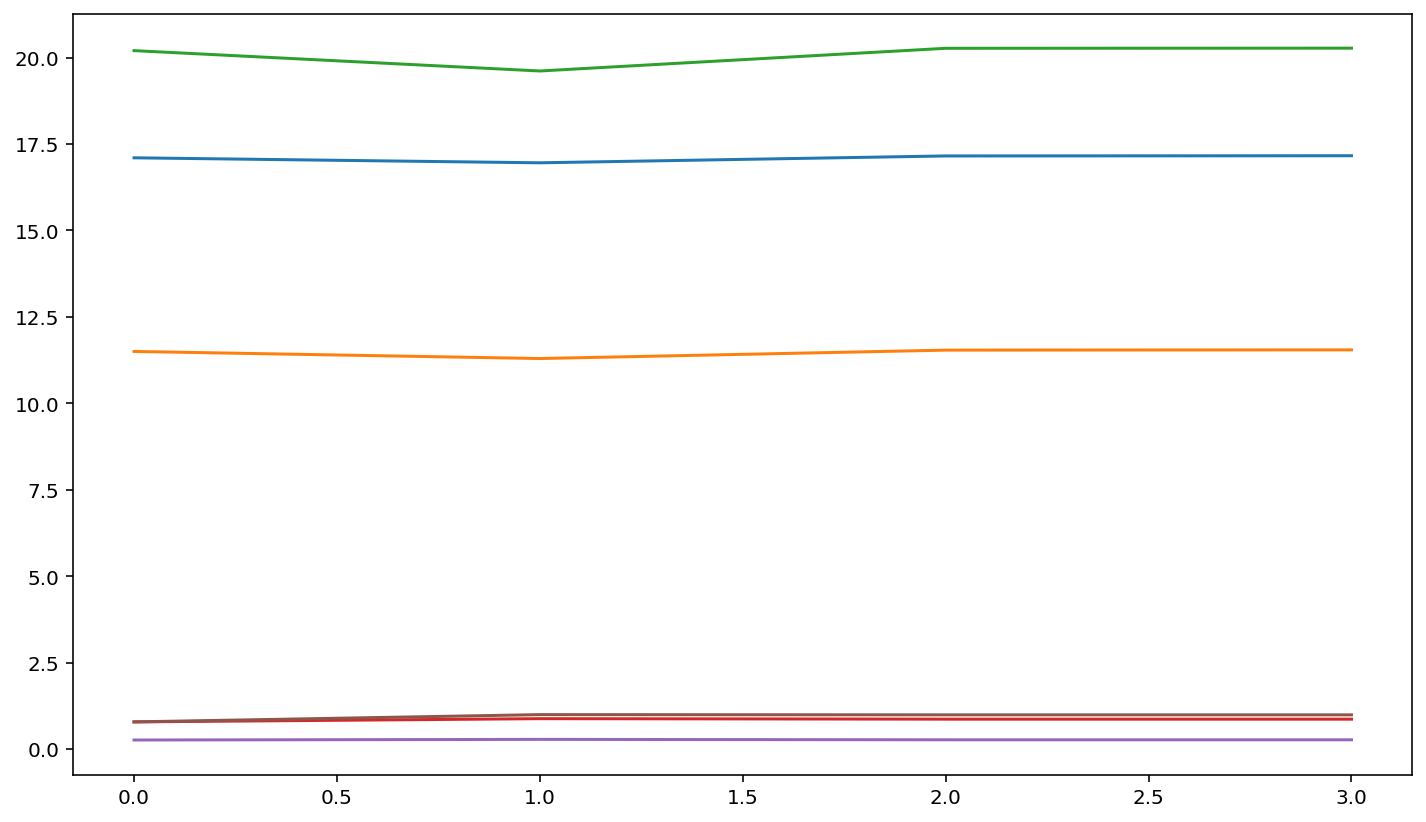

In [6]:
# Seteo de condiciones iniciales

#y_inicial = np.array([17.1, 11.5, 20.2, np.pi/4, np.pi/12, np.pi/4])
y_inicial = np.array([1.0, 1.0, 1.0, 0.1, 0.1, 0.1])


# Valor de la funcion en el punto inicial
print('Funcion en el punto inicial:\n{}\n'.format(fun_1(y_inicial)))

# Calculo de la solucion
y_final = NL_Newton_Raphson(y=y_inicial, fun=fun_1, jac=jac_1, plot_conv=True)


# Imprimir solucion en pantalla
print('Solucion encontrada: \n\n T_1= {} N \n T_2= {} N \n T_3= {} N \n theta_1= {}° \n theta_2= {}° \n theta_3= {}°'.format(y_final[0], y_final[1], y_final[2], np.rad2deg(np.mod(y_final[3],2*np.pi)), np.rad2deg(y_final[4]), np.rad2deg(y_final[5])  ))

# Imprimir el valor de la solucion
print('\n \nLa funcion vale:',fun_1(y_final))



## Solucion utilizando la libreria Scipy

In [5]:
from scipy import optimize

# Seteo de condiciones iniciales: Corresponde a las variables en el orden en que se pusieron en fun_1
cond_ini = np.array([0.5, 0.5, 0.5, 0.0, 0.0, 0.0])
cond_ini = np.array([10.0, 10.0, 10.0, np.pi/4, np.pi/12, np.pi/4 ])

# Obtencion de la solucion 
sol = optimize.root(fun_1, cond_ini, method='lm' )   #methods: hybr, lm, broyden1, broyden2, anderson, linearmixing, diagbroyden, krylov

# Imprimir solucion en pantalla
print('Solucion encontrada: \n\n T_1={} N \n T_2={} N \n T_3={} N \n theta_1={}° \n theta_2={}° \n theta_3={}°'.format(sol.x[0], sol.x[1], sol.x[2], np.rad2deg(np.mod(sol.x[3],2*np.pi)), np.rad2deg(np.mod(sol.x[4],2*np.pi)), np.rad2deg(np.mod(sol.x[5],2*np.pi))  ))

# Imprimir el valor de la solucion
print('\n \nLa funcion vale:',fun_1(sol.x))

Solucion encontrada: 

 T_1=17.160209784607293 N 
 T_2=11.54527968432776 N 
 T_3=20.271528044639116 N 
 theta_1=49.55267292060293° 
 theta_2=15.36420821606943° 
 theta_3=56.68940565508206°

 
La funcion vale: [ 0.00000000e+00  1.77635684e-15  0.00000000e+00 -1.77635684e-15
  0.00000000e+00  0.00000000e+00]


### Las soluciones encontradas por los dos métodos tienen los mismos valores pero todos los signos cambiados.

In [6]:
print(np.rad2deg(np.arcsin(np.sin(sol.x[3]))), np.rad2deg(np.arcsin(np.sin(y_final[3]))) )
print(np.rad2deg(np.arcsin(np.sin(sol.x[4]))), np.rad2deg(np.arcsin(np.sin(y_final[4]))) )
print(np.rad2deg(np.arcsin(np.sin(sol.x[5]))), np.rad2deg(np.arcsin(np.sin(y_final[5]))) )


49.55267292060293 49.55267292060311
15.364208216069427 15.364208216069322
56.68940565508207 56.689405655082055
